In [1]:
import numpy as np
import matplotlib.pyplot as plt

exp_P, exp_S = np.loadtxt('data/exp_0.33_P.txt'), np.loadtxt('data/exp_0.33_S.txt.txt')
CC_P, CC_S = np.loadtxt('data/CC_0.33_P.txt'), np.loadtxt('data/CC_0.33_S.txt.txt')
SPC_P, SPC_S = np.loadtxt('data/SPC_0.33_P.txt'), np.loadtxt('data/SPC_0.33_S.txt.txt')

In [2]:
nn = 15   #nc=10是勉强的，nc=8是不行的
E1, E2, w, nc = 0.08, 0.046, 0.057, nn

def fuhao(theta):
    if theta < 0:
        return -1
    else:
        return 1

#定义基频光电场：S方向
def Efs_field_sin2(t, theta):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >= -duration/2) & (t <= duration/2))
    result[idx] = (E1*np.cos(theta*np.pi/180)*
          np.sin(w*(t[idx]-duration/2)/(2.*nc))**2*np.cos(w*t[idx]))
    return result

#定义基频光电场：P方向
def Efp_field_sin2(t,theta):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >= -duration/2) & (t <= duration/2))
    result[idx] = (E1*np.sin(theta*np.pi/180)*
          np.sin(w*(t[idx]-duration/2)/(2.*nc))**2*fuhao(theta)*np.cos(w*t[idx]))
    return result

#定义倍频光电场矢势，倍频光始终是竖直偏振
def Eds_field_sin2(t, DT):
    duration = 2. * nc * np.pi / w
    result = np.zeros(len(t))
    idx = np.nonzero((t >=- duration/2+DT*41.34) & (t <= duration/2+DT*41.34))
    result[idx] = (E2* np.sin(w*(t[idx]-duration/2-DT*41.34)/(2.*nc))**2*
          np.cos(2*w*(t[idx]-DT*41.34)))
    return result

tl, tr = -836, 900
time = np.linspace(tl, tr, 1801)
nt, dt = len(time), time[1] - time[0]
Size = 19

Ei, Eh = 0.5, 0.5
r = Ei/Eh
def W(E):    #定义电离率
    E = 0.000001 + np.abs(E)
    return (4.0/E)*r**(5/2)*np.exp((-2/(3*E))*(r**(3/2)))

In [3]:
theta = np.linspace(0, 90, 40)
ta = 0.333
JP, JS = [], []
for thet in theta:
    ES = Efs_field_sin2(time, thet) + Eds_field_sin2(time, ta)
    EP = Efp_field_sin2(time, thet)
    Wt_ADK = W(np.sqrt(ES**2+EP**2))
    AP, AS = [], []
    for i in range(len(time)):
        APi, ASi = 0, 0
        for j in range(len(time)-i):
            APi = APi - EP[i+j]*dt 
            ASi = ASi - ES[i+j]*dt
        AP.append(APi)
        AS.append(ASi)
        
    J_RCD_P, J_RCD_S = 0, 0
    for i in range(len(time)):
        J_RCD_P  = J_RCD_P + Wt_ADK[i]*AP[i]
        J_RCD_S  = J_RCD_S + Wt_ADK[i]*AS[i] 
    JP.append(J_RCD_P)
    JS.append(J_RCD_S)

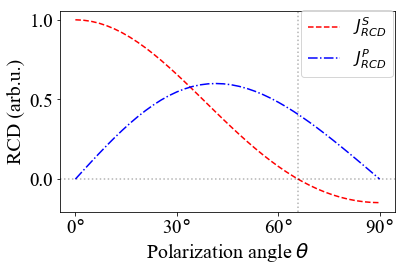

In [5]:
nofont = {'fontname':'Times New Roman'}
plt.figure(figsize=(6,3.7))
plt.plot(theta, JS/max(JS), c='r', ls='--', label=r'$J_{RCD}^{S}$')
plt.plot(theta, JP/max(JS), c='b', ls='-.', label=r'$J_{RCD}^{P}$')
plt.axhline(y=0, ls=':', color='black', alpha=0.3)
plt.axvline(x=65.84, ls=':', color='black', alpha=0.3)
plt.legend(loc=(0.72,0.67),prop={'size':0.85*Size, 'family':'Times New Roman'},frameon=1)
ax1 = plt.gca()
Xscale = np.linspace(0,90,4)
ax1.set_xticks(Xscale)
ax1.set_xticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)
for label in (ax1.get_xticklabels()):
    label.set_fontname('Times New Roman')
for label in (ax1.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.xlabel(r"Polarization angle $\theta$", size=Size+1,**nofont)
plt.ylabel(r"RCD (arb.u.)", size=Size+1,**nofont)
plt.tick_params(axis='both', which='major', labelsize=Size)

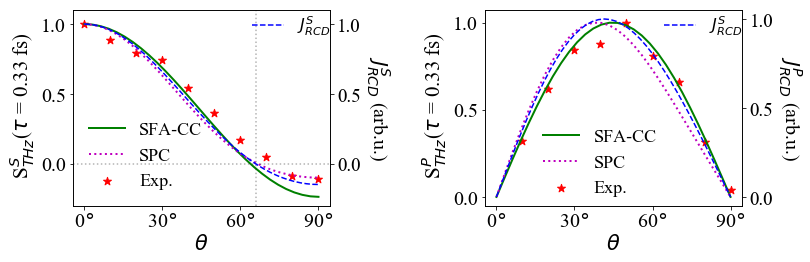

In [6]:
Ang = np.linspace(0,90,30)
Phase = np.linspace(0,1.333,30)
theta_exp = np.linspace(0, 90, 10)
plt.figure(figsize=(12, 3.6))
plt.subplot(121)
ax1 = plt.gca()
ax1.scatter(theta_exp, exp_S, marker='*', color='r', s=70, label='Exp.')
ax1.plot(Ang, CC_S, 'g', lw=2, label='SFA-CC')
ax1.plot(Ang, SPC_S, 'm:', lw=2, label='SPC')

plt.legend(prop={'size':18, 'family':'Times New Roman'}, loc=3, frameon=0)
plt.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticks(np.linspace(0, 90, 4))
ax1.set_xticklabels(('0$\degree$', '30$\degree$', '60$\degree$', '90$\degree$'), **nofont)
for l in ax1.yaxis.get_ticklabels():
    l.set_family('Times New Roman')
plt.xlabel(r'$\theta$',size=1.1*Size,**nofont)
plt.ylabel(r' S$_{THz}^{S}$($\tau$ = 0.33 fs)',size=1.1*Size,**nofont)
plt.axhline(y=0, ls=':', color='black', alpha=0.3)
plt.axvline(x=65.84, ls=':', color='black', alpha=0.3)
plt.ylim(-0.3,1.1)
ax2 = ax1.twinx()
ax2.plot(theta, JS/max(JS), c='b', ls='--', label=r'$J_{RCD}^{S}$')
ax2.set_ylim(-0.3,1.1)
ax2.legend(loc=(0.67,0.83),prop={'size':0.85*Size, 'family':'Times New Roman'},frameon=0)
for label in (ax2.get_yticklabels()):
    label.set_fontname('Times New Roman')   
plt.tick_params(axis='both', which='major', labelsize=Size)
ax2.set_ylabel(r"$J_{RCD}^{S}$ (arb.u.)", size=Size+1,**nofont, rotation = -90,labelpad = 30)

plt.subplot(122)
ax3 = plt.gca()
ax3.scatter(theta_exp[1:], exp_P[1:], marker='*', 
            color='r', s=70, label='Exp.')
ax3.plot(Ang, CC_P, 'g', lw=2, label='SFA-CC')
ax3.plot(Ang, SPC_P, 'm:', lw=2, label='SPC')

ax3.legend(prop={'size':18, 'family':'Times New Roman'}, loc=(0.2,0.01), frameon=0)
plt.tick_params(axis='both', which='major', labelsize=20)
ax3.set_xticks(np.linspace(0, 90, 4))
ax3.set_xticklabels(('0$\degree$', '30$\degree$', '60$\degree$', '90$\degree$'), **nofont)
for l in ax3.yaxis.get_ticklabels():
    l.set_family('Times New Roman')
plt.xlabel(r'$\theta$',size=1.1*Size,**nofont)
plt.ylabel(r' S$_{THz}^{P}$($\tau$ = 0.33 fs)',size=1.1*Size,**nofont)
ax4 = ax3.twinx()
ax4.plot(theta, JP/max(JP), c='b', ls='--', label=r'$J_{RCD}^{S}$')
ax4.legend(loc=(0.67,0.83),prop={'size':0.85*Size, 'family':'Times New Roman'},frameon=0)
for label in (ax4.get_yticklabels()):
    label.set_fontname('Times New Roman')   
plt.tick_params(axis='both', which='major', labelsize=Size)
ax4.set_ylabel(r"$J_{RCD}^{P}$ (arb.u.)", size=Size+1,**nofont, rotation = -90,labelpad = 30)
ax4.set_yticks(np.linspace(0, 1, 3))
plt.subplots_adjust(wspace=0.6)
plt.savefig('fig/0.33.pdf', dpi=256, bbox_inches='tight')
plt.savefig('fig/0.33.png', dpi=256, bbox_inches='tight')